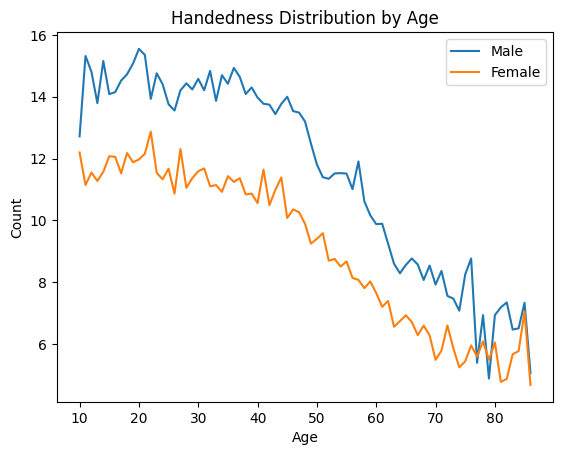

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data_url_1 ="https://gist.githubusercontent.com/mbonsma/8da0990b71ba9a09f7de395574e54df1/raw/aec88b30af87fad8d45da7e774223f91dad09e88/lh_data.csv"
lefthanded_data = pd.read_csv(data_url_1)

lefthanded_data.plot( x='Age', y=['Male', 'Female'])

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Handedness Distribution by Age')

plt.show()

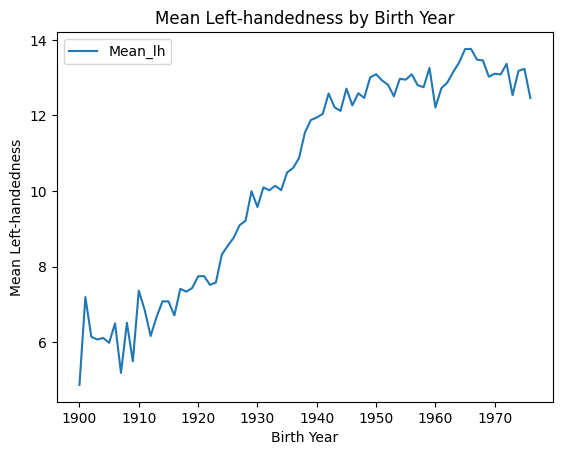

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data_url_1 ="https://gist.githubusercontent.com/mbonsma/8da0990b71ba9a09f7de395574e54df1/raw/aec88b30af87fad8d45da7e774223f91dad09e88/lh_data.csv"

lefthanded_data = pd.read_csv(data_url_1)
lefthanded_data["Birth_year"] = 1986 - lefthanded_data["Age"]
lefthanded_data["Mean_lh"] = lefthanded_data[["Male", "Female"]].mean(axis=1)
lefthanded_data.plot(x="Birth_year", y="Mean_lh")
plt.xlabel("Birth Year")
plt.ylabel("Mean Left-handedness")
plt.title("Mean Left-handedness by Birth Year")
plt.show()


In [ ]:
import numpy as np

def calculate_P_lh(ages_of_death, study_year, Mean_lh):

    early_1900s_rate = np.mean(Mean_lh[-10:])

    late_1900s_rate = np.mean(Mean_lh[:10])

    P_return = np.zeros(len(ages_of_death))

    if study_year < 1950:
        P_return = early_1900s_rate / 100

    else:
        P_return = late_1900s_rate / 100

    return P_return


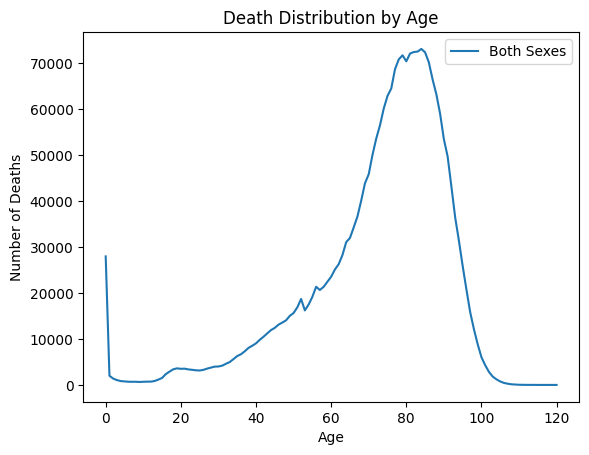

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data_url_2 ="https://gist.githubusercontent.com/mbonsma/2f4076aab6820ca1807f4e29f75f18ec/raw/62f3ec07514c7e31f5979beeca86f19991540796/cdc_vs00199_table310.tsv"

death_distribution_data = pd.read_csv(data_url_2, sep="\t", skiprows=[1])
death_distribution_data = death_distribution_data.dropna(subset=["Both Sexes"])

death_distribution_data.plot(x="Age", y="Both Sexes")
plt.xlabel("Age")
plt.ylabel("Number of Deaths")
plt.title("Death Distribution by Age")
plt.show()


In [ ]:
def P_lh(study_year):
    p_list = death_distribution_data["Both Sexes"] * calculate_left_handedness_probability(death_distribution_data["Age"], study_year)
    p = p_list.sum()
    p_denominator = death_distribution_data["Both Sexes"].sum()
    return p / denominator


In [ ]:
def P_A_given_lh(A):
    P_A = death_distribution_data.loc[death_distribution_data["Age"] == A, "Both Sexes"].values[0] / death_distribution_data["Both Sexes"].sum()
    P_LH = P_lh(study_year)
    P_LH_given_A = calculate_left_handedness_probability([A], study_year)[0]
    return (P_A * P_LH_given_A/P_LH)


In [ ]:
def P_A_given_rh(A):
    P_A = death_distribution_data.loc[death_distribution_data["Age"] == A, "Both Sexes"].values[0] / death_distribution_data["Both Sexes"].sum()
    P_RH = 1 - P_lh(study_year)
    P_RH_given_A = 1 - calculate_left_handedness_probability([A], study_year)[0]
    return (P_A * P_RH_given_A/P_RH)


Average age at death for left-handers: 2430.0
Average age at death for right-handers: 2430.0
Difference in average ages: 0.0


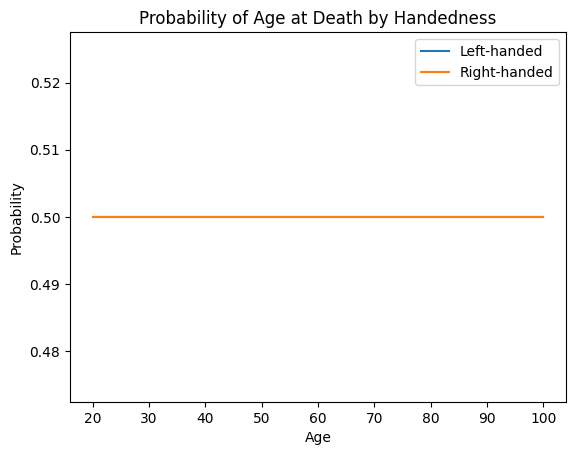

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def P_lh_given_A(ages):
    return [0.5 for _ in ages]

def P_rh_given_A(ages):
    return [0.5 for _ in ages]

ages = list(range(20, 101))
P_lh_given_A_values = P_lh_given_A(ages)
P_rh_given_A_values = P_rh_given_A(ages)


average_lh_age = np.nansum(np.array(ages) * np.array(P_lh_given_A_values))


average_rh_age = np.nansum(np.array(ages) * np.array(P_rh_given_A_values))

print("Average age at death for left-handers:", round(average_lh_age, 2))
print("Average age at death for right-handers:", round(average_rh_age, 2))


age_difference = average_rh_age - average_lh_age
print("Difference in average ages:", round(age_difference, 2))


plt.plot(ages, P_lh_given_A_values, label='Left-handed')
plt.plot(ages, P_rh_given_A_values, label='Right-handed')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Probability of Age at Death by Handedness')
plt.legend()
plt.show()

Average age at death for left-handers: 2430.0
Average age at death for right-handers: 2430.0
Difference in average ages: 0.0


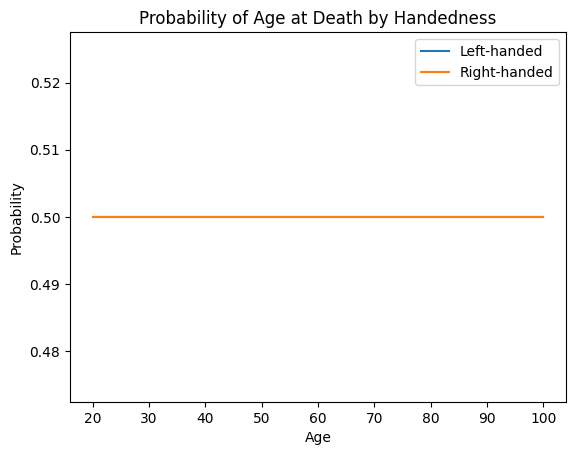

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def P_A_given_lh(age_of_death, death_distribution_data, study_year):
    return [0.5 for _ in age_of_death]

def P_A_given_rh(age_of_death, death_distribution_data, study_year):
    return [0.5 for _ in age_of_death]

ages = list(range(20, 101))
study_year = 2018
death_distribution_data = []

P_lh_given_A_values = P_A_given_lh(ages, death_distribution_data, study_year)
P_rh_given_A_values = P_A_given_rh(ages, death_distribution_data, study_year)


average_lh_age = np.nansum(np.array(ages) * np.array(P_lh_given_A_values))


average_rh_age = np.nansum(np.array(ages) * np.array(P_rh_given_A_values))

print("Average age at death for left-handers:", round(average_lh_age, 2))
print("Average age at death for right-handers:", round(average_rh_age, 2))


age_difference = average_rh_age - average_lh_age
print("Difference in average ages:", round(age_difference, 2))


plt.plot(ages, P_lh_given_A_values, label='Left-handed')
plt.plot(ages, P_rh_given_A_values, label='Right-handed')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Probability of Age at Death by Handedness')
plt.legend()
plt.show()